<a href="https://colab.research.google.com/github/aparajitakar/nfl_yards_gained/blob/main/EDA_Aparajita_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!ls '/content/gdrive/Shareddrives/CSCI 5523 Project/dev/'

csv		   EDA_Miguel.ipynb   index_generator.ipynb  train_old.csv
EDA_Anirudh.ipynb  EDA_Sravani.ipynb  train.csv		     Untitled


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Script directory
main_dir = '/content/gdrive/Shareddrives/CSCI 5523 Project/dev/'
print(main_dir)

# Pre-trained model directory
data_dir = main_dir + 'train.csv'
print(data_dir)

/content/gdrive/Shareddrives/CSCI 5523 Project/dev/
/content/gdrive/Shareddrives/CSCI 5523 Project/dev/train.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv(data_dir)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (48) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
print(data.columns)

Index(['Unnamed: 0', 'GameId', 'PlayId', 'Team', 'X', 'Y', 'S', 'A', 'Dis',
       'Orientation', 'Dir', 'NflId', 'DisplayName', 'JerseyNumber', 'Season',
       'YardLine', 'Quarter', 'GameClock', 'PossessionTeam', 'Down',
       'Distance', 'FieldPosition', 'HomeScoreBeforePlay',
       'VisitorScoreBeforePlay', 'NflIdRusher', 'OffenseFormation',
       'OffensePersonnel', 'DefendersInTheBox', 'DefensePersonnel',
       'PlayDirection', 'TimeHandoff', 'TimeSnap', 'Yards', 'PlayerHeight',
       'PlayerWeight', 'PlayerBirthDate', 'PlayerCollegeName', 'Position',
       'HomeTeamAbbr', 'VisitorTeamAbbr', 'Week', 'Stadium', 'Location',
       'StadiumType', 'Turf', 'GameWeather', 'Temperature', 'Humidity',
       'WindSpeed', 'WindDirection', 'unique_idx'],
      dtype='object')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682154 entries, 0 to 682153
Data columns (total 51 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              682154 non-null  int64  
 1   GameId                  682154 non-null  int64  
 2   PlayId                  682154 non-null  int64  
 3   Team                    682154 non-null  object 
 4   X                       682154 non-null  float64
 5   Y                       682154 non-null  float64
 6   S                       682154 non-null  float64
 7   A                       682154 non-null  float64
 8   Dis                     682154 non-null  float64
 9   Orientation             682131 non-null  float64
 10  Dir                     682126 non-null  float64
 11  NflId                   682154 non-null  int64  
 12  DisplayName             682154 non-null  object 
 13  JerseyNumber            682154 non-null  int64  
 14  Season              

In [ ]:
data.head()

,Unnamed: 0,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,NflId,DisplayName,JerseyNumber,Season,YardLine,Quarter,GameClock,PossessionTeam,Down,Distance,FieldPosition,HomeScoreBeforePlay,VisitorScoreBeforePlay,NflIdRusher,OffenseFormation,OffensePersonnel,DefendersInTheBox,DefensePersonnel,PlayDirection,TimeHandoff,TimeSnap,Yards,PlayerHeight,PlayerWeight,PlayerBirthDate,PlayerCollegeName,Position,HomeTeamAbbr,VisitorTeamAbbr,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection,unique_idx
0,0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,496723,Eric Berry,29,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-0,212,12/29/1988,Tennessee,SS,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW,1
1,1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,2495116,Allen Bailey,97,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-3,288,03/25/1989,Miami,DE,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW,2
2,2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,2495493,Justin Houston,50,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-3,270,01/21/1989,Georgia,DE,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW,3
3,3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,2506353,Derrick Johnson,56,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-3,245,11/22/1982,Texas,ILB,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW,4
4,4,2017090700,20170907000118,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,2530794,Ron Parker,38,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-0,206,08/17/1987,Newberry,FS,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW,5


In [ ]:
print(f"The dimension of the data is {data.shape}")

The dimension of the data is (682154, 51)


In [ ]:
data.duplicated(keep = "first")

0         False
1         False
2         False
3         False
4         False
          ...  
682149    False
682150    False
682151    False
682152    False
682153    False
Length: 682154, dtype: bool

In [ ]:
#percent missing data 

for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
GameId - 0%
PlayId - 0%
Team - 0%
X - 0%
Y - 0%
S - 0%
A - 0%
Dis - 0%
Orientation - 0%
Dir - 0%
NflId - 0%
DisplayName - 0%
JerseyNumber - 0%
Season - 0%
YardLine - 0%
Quarter - 0%
GameClock - 0%
PossessionTeam - 0%
Down - 0%
Distance - 0%
FieldPosition - 1%
HomeScoreBeforePlay - 0%
VisitorScoreBeforePlay - 0%
NflIdRusher - 0%
OffenseFormation - 0%
OffensePersonnel - 0%
DefendersInTheBox - 0%
DefensePersonnel - 0%
PlayDirection - 0%
TimeHandoff - 0%
TimeSnap - 0%
Yards - 0%
PlayerHeight - 0%
PlayerWeight - 0%
PlayerBirthDate - 0%
PlayerCollegeName - 0%
Position - 0%
HomeTeamAbbr - 0%
VisitorTeamAbbr - 0%
Week - 0%
Stadium - 0%
Location - 0%
StadiumType - 6%
Turf - 0%
GameWeather - 9%
Temperature - 9%
Humidity - 1%
WindSpeed - 13%
WindDirection - 15%
unique_idx - 0%


In [ ]:
data["Team"].describe() #NO MISSING VALUES. 

count     682154
unique         2
top         away
freq      341077
Name: Team, dtype: object

In [ ]:
data["Team"].value_counts()  
#uniform distribution. 
#home #away 

away    341077
home    341077
Name: Team, dtype: int64

In [ ]:
data["Dis"].describe() #no missing values. 

count    682154.000000
mean          0.278193
std           0.145218
min           0.000000
25%           0.160000
50%           0.270000
75%           0.390000
max           1.390000
Name: Dis, dtype: float64

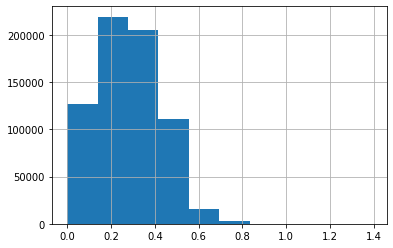

In [ ]:
data["Dis"].hist() #has zero values #do not know if that makes any sense. 

In [ ]:
data["JerseyNumber"].value_counts() #not relevant given context.  

21    14806
23    13396
26    12877
90    11850
24    11682
      ...  
49     1752
2      1506
46     1419
6      1125
1       819
Name: JerseyNumber, Length: 99, dtype: int64

In [ ]:
data["JerseyNumber"].isnull().any()

False

In [ ]:
data["PossessionTeam"].value_counts()  #domain knowledge reqd. 

NE     24860
BLT    23848
MIN    23606
SF     23562
SEA    23298
LA     23254
DAL    23012
JAX    22616
IND    22616
NO     22528
PHI    22352
DEN    22330
HST    22066
LAC    21824
TEN    21692
OAK    21648
BUF    21582
CHI    21296
DET    21054
NYJ    20526
PIT    20372
ATL    19954
NYG    19932
CLV    19822
CAR    19690
WAS    19602
TB     19448
ARZ    19316
KC     19052
CIN    18898
GB     18392
MIA    18106
Name: PossessionTeam, dtype: int64

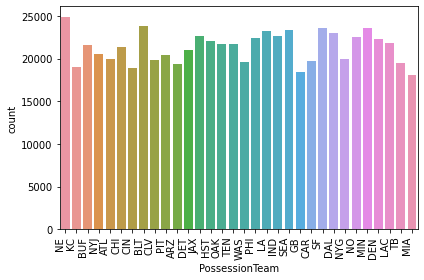

In [ ]:
import seaborn as sns
ax = sns.countplot(x="PossessionTeam", data=data)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

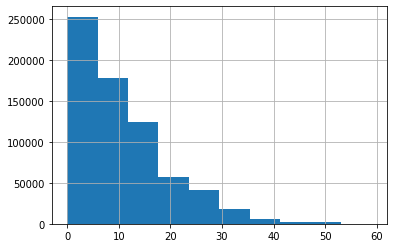

In [ ]:
data["VisitorScoreBeforePlay"].hist()
#data skewed #need normalization 

In [ ]:
data["VisitorScoreBeforePlay"].describe()
#data skewed #need normalization 

count    682154.000000
mean          9.762570
std           9.532945
min           0.000000
25%           0.000000
50%           7.000000
75%          16.000000
max          59.000000
Name: VisitorScoreBeforePlay, dtype: float64

In [ ]:
data["DefensePersonnel"].value_counts()  #need three cloumns of it. 

4 DL, 2 LB, 5 DB          177188
4 DL, 3 LB, 4 DB          173250
3 DL, 4 LB, 4 DB          110418
2 DL, 4 LB, 5 DB           81378
3 DL, 3 LB, 5 DB           74932
2 DL, 3 LB, 6 DB           17336
4 DL, 1 LB, 6 DB           10450
5 DL, 2 LB, 4 DB            7084
4 DL, 4 LB, 3 DB            6490
3 DL, 2 LB, 6 DB            5258
5 DL, 3 LB, 3 DB            3212
1 DL, 4 LB, 6 DB            2200
5 DL, 4 LB, 2 DB            1672
3 DL, 5 LB, 3 DB            1672
6 DL, 3 LB, 2 DB            1408
6 DL, 4 LB, 1 DB            1364
5 DL, 1 LB, 5 DB            1100
1 DL, 5 LB, 5 DB             924
6 DL, 2 LB, 3 DB             880
2 DL, 5 LB, 4 DB             616
1 DL, 3 LB, 7 DB             506
2 DL, 2 LB, 7 DB             418
4 DL, 5 LB, 2 DB             352
5 DL, 5 LB, 1 DB             330
3 DL, 1 LB, 7 DB             286
2 DL, 4 LB, 4 DB, 1 RB       220
1 DL, 4 LB, 5 DB, 1 RB       154
5 DL, 3 LB, 2 DB, 1 OL       154
0 DL, 5 LB, 6 DB             132
0 DL, 4 LB, 7 DB             132
1 DL, 3 LB

In [ ]:
#create 5 columns each with number of DL,LB,DB,RB,OL

data["DP_DL"] = data["DefensePersonnel"].apply(lambda x: int(x.split()[0]))
data["DP_LB"] = data["DefensePersonnel"].apply(lambda x: int(x.split()[2]))
data["DP_DB"] = data["DefensePersonnel"].apply(lambda x: int(x.split()[4]))
data["DP_RB"] = data["DefensePersonnel"].apply(lambda x: 1 if "RB" in x else 0)
data["DP_OL"] = data["DefensePersonnel"].apply(lambda x: 1 if "OL" in x else 0)

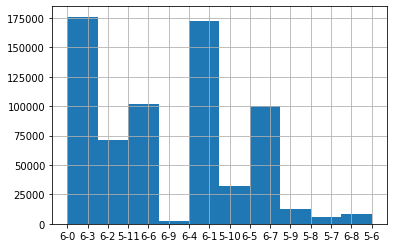

In [ ]:
data["PlayerHeight"].hist()

In [ ]:
data["PlayerHeight"].value_counts()

6-3     108240
6-4      90139
6-5      83706
6-1      82336
6-2      71347
6-0      67819
5-11     54009
6-6      47488
5-10     32286
6-7      16099
5-9      12251
6-8       7646
5-8       4638
6-9       2683
5-7        945
5-6        522
Name: PlayerHeight, dtype: int64

In [ ]:
data["Height_in_cms"] = data["PlayerHeight"].apply(lambda x:(int(x.split("-")[0])*12 + int(x.split("-")[1]))*2.54)

In [ ]:
data["Height_in_cms"].value_counts()  #converted to cms #need to delete PlayerHeight

190.50    108240
193.04     90139
195.58     83706
185.42     82336
187.96     71347
182.88     67819
180.34     54009
198.12     47488
177.80     32286
200.66     16099
175.26     12251
203.20      7646
172.72      4638
205.74      2683
170.18       945
167.64       522
Name: Height_in_cms, dtype: int64

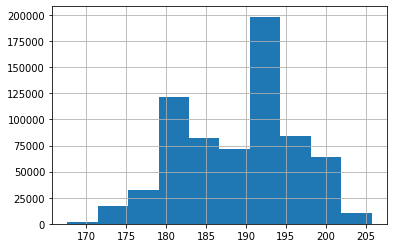

In [ ]:
data["Height_in_cms"].hist()

In [ ]:
data["Height_in_cms"].describe()

count    682154.000000
mean        188.949412
std           6.593623
min         167.640000
25%         182.880000
50%         190.500000
75%         193.040000
max         205.740000
Name: Height_in_cms, dtype: float64

In [ ]:
data["HomeTeamAbbr"].value_counts() #need domain knowledge

SF     23848
BUF    23210
OAK    22748
IND    22440
NYG    22308
CIN    22242
NE     22176
LA     21956
NYJ    21912
GB     21736
SEA    21648
TEN    21648
CLE    21626
MIN    21604
DEN    21582
WAS    21538
DAL    21362
BAL    21318
ARI    21252
MIA    21164
LAC    21120
HOU    20988
NO     20922
CHI    20526
DET    20416
PIT    20350
PHI    20218
JAX    20174
KC     20152
ATL    19932
TB     19074
CAR    18964
Name: HomeTeamAbbr, dtype: int64

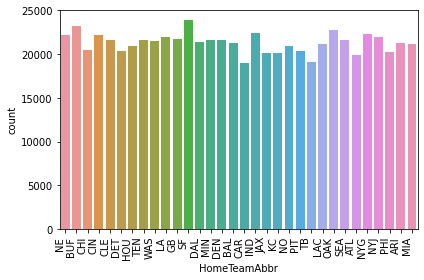

In [ ]:
ax = sns.countplot(x="HomeTeamAbbr", data=data)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
data["HomeTeamAbbr"].describe()

count     682154
unique        32
top           SF
freq       23848
Name: HomeTeamAbbr, dtype: object

In [ ]:
data["Stadium"].describe()

count              682154
unique                 61
top       MetLife Stadium
freq                31702
Name: Stadium, dtype: object

In [ ]:
data["Stadium"].isnull().value_counts()

False    682154
Name: Stadium, dtype: int64

In [ ]:
data[["StadiumType"]].isnull().value_counts()

StadiumType
False          640464
True            41690
dtype: int64

In [ ]:
data["StadiumType"].value_counts()

Outdoor                      362516
Outdoors                      92708
Indoors                       56826
Dome                          23122
Indoor                        19140
Retractable Roof              18766
Open                          11308
Retr. Roof-Closed             11044
Domed, closed                  6908
Retr. Roof - Closed            6446
Domed, open                    3696
Retr. Roof-Open                3014
Retractable Roof - Closed      2222
Closed Dome                    2134
Dome, closed                   1826
Domed                          1826
Domed, Open                    1760
OUTDOOR                        1254
Oudoor                         1188
indoor                         1166
Retr. Roof Closed              1056
Indoor, Roof Closed            1056
Bowl                            968
Outddors                        968
Heinz Field                     902
Outdoor Retr Roof-Open          880
Retr. Roof - Open               880
Ourdoor                     

In [ ]:
data.groupby(["Stadium","StadiumType"]).size()

Stadium                        StadiumType           
AT&T Stadium                   Indoor                    12804
                               Indoors                    3828
                               OUTDOOR                    1254
                               Outdoor                    1166
                               Outdoors                   1144
                                                         ...  
U.S. Bank Stadium              Indoors                   15268
University of Phoenix Stadium  Dome                       6732
                               Outdoor Retr Roof-Open      880
Wembley Stadium                Outdoor                     836
                               Outdoors                   5588
Length: 93, dtype: int64

In [ ]:
data.loc[data["StadiumType"].isnull()]["Stadium"].value_counts()

MetLife Stadium               21406
StubHub Center                14630
Dignity Health Sports Park     4686
TIAA Bank Field                 968
Name: Stadium, dtype: int64

In [ ]:
data.loc[data["Stadium"] == "Metlife Stadium"]["StadiumType"].value_counts()

Outdoor    836
Name: StadiumType, dtype: int64

In [ ]:
#data.loc[data["Stadium"] == "StubHub Center"]["StadiumType"].value_counts()
data.loc[data["Stadium"] == "TIAA Bank Field"]["StadiumType"].value_counts()

Open       3630
Outdoor    3498
Bowl        968
Cloudy      770
Name: StadiumType, dtype: int64

In [ ]:
#All missing values stadiumtype are outdoor stadium 

data['StadiumType'].fillna(value= "outdoor", inplace=True)


In [ ]:
data["StadiumType"].isnull().any()

False

In [ ]:
def StadiumType(X):
    X.replace("Outdoor","outdoor",inplace = True)
    X.replace("Open","outdoor",inplace = True)
    X.replace("Cloudy","outdoor",inplace = True)
    X.replace("Bowl","outdoor",inplace = True)
    X.replace("Outdoors","outdoor",inplace = True)
    X.replace("OUTDOOR","outdoor",inplace = True)
    X.replace("Oudoor","outdoor",inplace = True)
    X.replace("Outddors","outdoor",inplace = True)
    X.replace("Outside","outdoor",inplace = True)
    X.replace("Ourdoor","outdoor",inplace = True)
    X.replace("Outddors","outdoor",inplace = True)
    X.replace("Outdor","outdoor",inplace = True)
    X.replace("Indoors","indoor",inplace = True)
    X.replace("Indoor","indoor",inplace = True)
    X.replace("indoor","indoor",inplace = True)
    X.replace("Indoors","indoor",inplace = True)
    X.replace("Domed","dome",inplace = True)
    X.replace("Heinz Field","outdoor",inplace = True)
    
StadiumType(data["StadiumType"])    

In [ ]:
data["StadiumType"] = data["StadiumType"].apply(lambda x: x.lower())

In [ ]:
data["StadiumType"] = data["StadiumType"].apply(lambda x: "outdoor" if "closed" in x else x)
data["StadiumType"] = data["StadiumType"].apply(lambda x: "indoor" if "open" in x else x)

In [ ]:
data["StadiumType"].value_counts()  #only 4 categories. outdoor, indoor, dome, retractable roof, d

outdoor             549494
indoor               88946
dome                 24948
retractable roof     18766
Name: StadiumType, dtype: int64

In [ ]:
data["WindSpeed"].value_counts()

5                    36102
5.0                  30162
7.0                  27544
6.0                  26540
7                    24750
                     ...  
SSE                    836
15 gusts up to 25      836
9mph                   792
11-17                  726
19                     660
Name: WindSpeed, Length: 69, dtype: int64

In [ ]:
data["WindSpeed"] = data["WindSpeed"].astype(str)

In [ ]:
data["WindSpeed"].value_counts()

nan                  91872
5                    42768
6                    29964
7                    29326
3                    25824
                     ...  
15 gusts up to 25      836
SSE                    836
22                     836
9mph                   792
11-17                  726
Name: WindSpeed, Length: 70, dtype: int64

In [ ]:
def WindSpeed(X):
    X['WindSpeed_dc'] = X['WindSpeed'].apply(lambda x: x.lower().replace('mph', '').strip() if not pd.isna(x) else x)
    X['WindSpeed_dc'] = X['WindSpeed_dc'].apply(lambda x: x.replace(', gusts to ', '').strip().split()[0] if not pd.isna(x) else x)
    X['WindSpeed_dc'] = X['WindSpeed_dc'].apply(lambda x: (int(x.split('-')[0])+int(x.split('-')[1]))/2 if not pd.isna(x) and '-' in x else x)
    X["WindSpeed_dc"].replace("calm",0,inplace = True)
    X["WindSpeed_dc"] = X["WindSpeed_dc"].apply(pd.to_numeric, errors='coerce').fillna(X["WindSpeed_dc"].mode())
    X["WindSpeed_dc"].replace(np.nan, X["WindSpeed_dc"].mean(),inplace = True)
    
WindSpeed(data)

In [ ]:
data["WindSpeed_dc"].value_counts() #need to impute missing value

7.593078     96690
5.000000     66264
7.000000     53394
6.000000     53020
10.000000    46860
4.000000     42592
9.000000     41690
3.000000     39952
8.000000     38940
2.000000     33902
12.000000    32516
11.000000    23870
15.000000    19998
13.000000    19426
0.000000     16764
1.000000     15708
16.000000    10978
14.000000     9702
17.000000     7942
18.000000     3102
23.000000     2156
20.000000     2090
19.000000     1826
18.500000      968
24.000000      968
22.000000      836
Name: WindSpeed_dc, dtype: int64

In [ ]:
data["WindSpeed_dc"].isnull().any()

False

In [ ]:
data["WindSpeed_dc"].describe()

count    682154.000000
mean          7.593078
std           4.100317
min           0.000000
25%           5.000000
50%           7.593078
75%          10.000000
max          24.000000
Name: WindSpeed_dc, dtype: float64

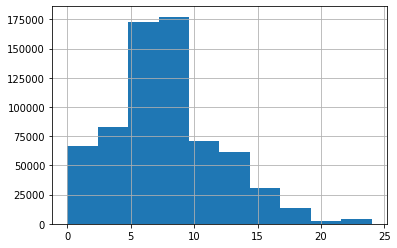

In [ ]:
data["WindSpeed_dc"].hist()

In [ ]:
#data["WindDirection"].value_counts()

In [ ]:
def WindDirection(X):
    X = X.str.replace("from","")
    X = X.str.replace("From","")
    X.replace("From SW","SW",inplace = True)
    X.replace("Southwest","SW",inplace = True)
    X.replace("South","S",inplace = True)
    X.replace("Northwest","NW",inplace = True)
    X.replace("South west","SW",inplace = True)
    X.replace("South Southwest","SSW",inplace = True)
    X.replace("Southerly","S",inplace = True)
    X.replace("NorthEast","NE",inplace = True)
    X.replace("NorthEast","NE",inplace = True)
    X.replace("Northeast","NE",inplace = True)
    X.replace("North","N",inplace = True)
    X.replace("East","E",inplace = True)
    X.replace("North East","NE",inplace = True)
    X.replace("West","W",inplace = True)
    X.replace("South","S",inplace = True)
    #X.replace("From SW","SW",inplace = True)
    X.replace("From SW","SW",inplace = True)
    
#WindDirection(data["WindDirection"])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682154 entries, 0 to 682153
Data columns (total 58 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              682154 non-null  int64  
 1   GameId                  682154 non-null  int64  
 2   PlayId                  682154 non-null  int64  
 3   Team                    682154 non-null  object 
 4   X                       682154 non-null  float64
 5   Y                       682154 non-null  float64
 6   S                       682154 non-null  float64
 7   A                       682154 non-null  float64
 8   Dis                     682154 non-null  float64
 9   Orientation             682131 non-null  float64
 10  Dir                     682126 non-null  float64
 11  NflId                   682154 non-null  int64  
 12  DisplayName             682154 non-null  object 
 13  JerseyNumber            682154 non-null  int64  
 14  Season              

In [ ]:
data_new = data[["Team","Dis","PossessionTeam", "VisitorScoreBeforePlay","DP_DL","DP_LB","DP_DB","DP_RB","DP_OL","Height_in_cms","WindSpeed_dc","StadiumType","HomeTeamAbbr"]]

In [ ]:
data_new['unique_idx'] = range(1, len(data_new.index)+1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_new.head(10)

,Team,Dis,PossessionTeam,VisitorScoreBeforePlay,DP_DL,DP_LB,DP_DB,DP_RB,DP_OL,Height_in_cms,WindSpeed_dc,StadiumType,HomeTeamAbbr,unique_idx
0,away,0.40,NE,0,2,3,6,0,0,182.88,8.0,outdoor,NE,1
1,away,0.01,NE,0,2,3,6,0,0,190.50,8.0,outdoor,NE,2
2,away,0.31,NE,0,2,3,6,0,0,190.50,8.0,outdoor,NE,3
3,away,0.02,NE,0,2,3,6,0,0,190.50,8.0,outdoor,NE,4
4,away,0.16,NE,0,2,3,6,0,0,182.88,8.0,outdoor,NE,5
5,away,0.18,NE,0,2,3,6,0,0,187.96,8.0,outdoor,NE,6
6,away,0.02,NE,0,2,3,6,0,0,180.34,8.0,outdoor,NE,7
7,away,0.13,NE,0,2,3,6,0,0,182.88,8.0,outdoor,NE,8
8,away,0.28,NE,0,2,3,6,0,0,187.96,8.0,outdoor,NE,9
9,away,0.51,NE,0,2,3,6,0,0,182.88,8.0,outdoor,NE,10


In [ ]:
data_new.to_csv("col_akar.csv")